## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

 Reading the dataset used in A1 

In [14]:
df = pd.read_csv("datasets/A1_preprocesed.csv")
df

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0.3,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,DeathCity,...,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,no_of_drugs,num_of_deaths_in_county,num_of_injuries_in_race
0,0,0,0,4/17/2015,32,Male,White,AMSTON,TOLLAND,AMSTON,...,0,0,0,0,0,0,1,3,137,3704
1,1,1,1,1/28/2015,49,Female,White,ANDOVER,TOLLAND,ANDOVER,...,0,0,0,0,0,0,1,3,137,3704
2,2,2,2,10/8/2018,42,Male,White,ANDOVER,TOLLAND,ANDOVER,...,0,0,0,0,0,0,1,3,137,3704
3,3,3,3,5/18/2014,34,Male,White,ANDOVER,TOLLAND,ANDOVER,...,0,0,0,0,0,0,0,2,137,3704
4,4,4,4,1/13/2018,35,Male,White,ANSONIA,NEW HAVEN,ANSONIA,...,0,0,0,0,0,0,1,4,1298,3704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,4665,4665,4665,2/16/2013,29,Male,White,WOODBURY,LITCHFIELD,WOODBURY,...,0,0,0,0,0,0,0,2,264,3704
4666,4666,4666,4666,9/21/2013,49,Female,White,WOODBURY,LITCHFIELD,WOODBURY,...,0,0,0,0,0,0,0,1,264,3704
4667,4667,4667,4667,12/6/2016,42,Male,White,WOODSTOCK,WINDHAM,WOODSTOCK,...,0,1,0,0,0,0,0,1,166,3704
4668,4668,4668,4668,7/14/2018,23,Female,White,WOODSTOCK,WINDHAM,WOODSTOCK,...,0,0,0,0,0,0,1,3,166,3704


Finding no.of residents per city

In [15]:
# Add a new column with the count of residents per city
df['CityResidentCount'] = df.groupby('ResidenceCity')['ResidenceCity'].transform('count')

### Running a K-means Clustering model into 3 categories

In [16]:
# Select features for clustering
features = df[['CityResidentCount', 'Age']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [17]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the updated DataFrame
print(df)

columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.3']
df = df.drop(columns=columns_to_remove)
df.to_csv('clean7_drug_deaths.csv')

      Unnamed: 0.1  Unnamed: 0  Unnamed: 0.3        Date  Age     Sex   Race  \
0                0           0             0   4/17/2015   32    Male  White   
1                1           1             1   1/28/2015   49  Female  White   
2                2           2             2   10/8/2018   42    Male  White   
3                3           3             3   5/18/2014   34    Male  White   
4                4           4             4   1/13/2018   35    Male  White   
...            ...         ...           ...         ...  ...     ...    ...   
4665          4665        4665          4665   2/16/2013   29    Male  White   
4666          4666        4666          4666   9/21/2013   49  Female  White   
4667          4667        4667          4667   12/6/2016   42    Male  White   
4668          4668        4668          4668   7/14/2018   23  Female  White   
4669          4669        4669          4669  10/14/2017   31    Male  White   

     ResidenceCity ResidenceCounty  Dea

c:\Users\Siddharth\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


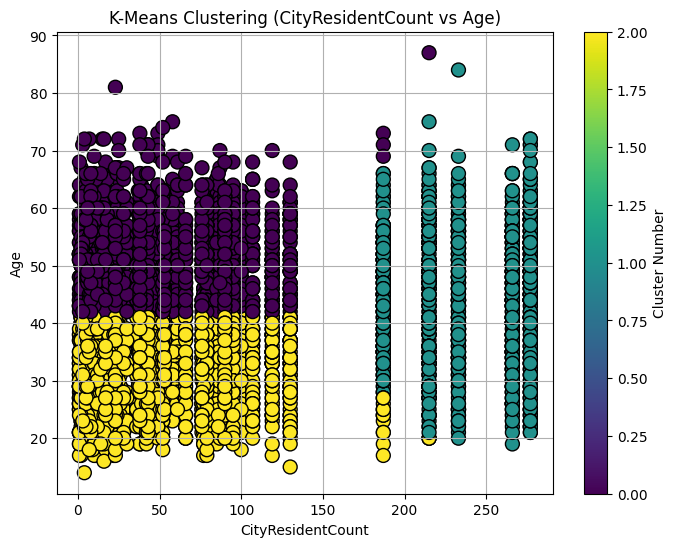

In [18]:

# Scatter plot with CityResidentCount and Age
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df['CityResidentCount'], 
    df['Age'], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=100, 
    edgecolor='k'
)

# Add labels and title
plt.xlabel('CityResidentCount')
plt.ylabel('Age')
plt.title('K-Means Clustering (CityResidentCount vs Age)')
plt.colorbar(scatter, label='Cluster Number')
plt.grid(True)
plt.show()


In [19]:
df_clean7 = pd.read_csv("clean7_drug_deaths.csv")
# Group by 'DeathCity' and count the number of residents per city
df_clean7['DeathsPerCity'] = df_clean7.groupby('DeathCity')['DeathCity'].transform('count')

df_clean7.head()

,Unnamed: 0,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,DeathCity,DeathCounty,Location,...,Morphine_NotHeroin,Hydromorphone,OpiateNOS,AnyOpioid,no_of_drugs,num_of_deaths_in_county,num_of_injuries_in_race,CityResidentCount,Cluster,DeathsPerCity
0,0,4/17/2015,32,Male,White,AMSTON,TOLLAND,AMSTON,TOLLAND,Residence,...,0,0,0,1,3,137,3704,1,2,1
1,1,1/28/2015,49,Female,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,0,1,3,137,3704,3,0,3
2,2,10/8/2018,42,Male,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,0,1,3,137,3704,3,0,3
3,3,5/18/2014,34,Male,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,0,0,2,137,3704,3,2,3
4,4,1/13/2018,35,Male,White,ANSONIA,NEW HAVEN,ANSONIA,NEW HAVEN,Residence,...,0,0,0,1,4,1298,3704,37,2,23


In [20]:
df_clean7.to_csv('DeathsPerCity_clustering.csv')

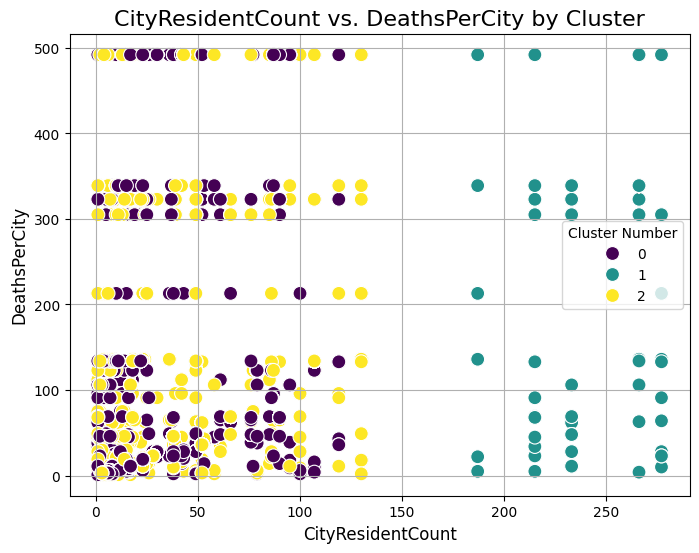

In [22]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    data=df_clean7,
    x='CityResidentCount',
    y='DeathsPerCity',
    hue='Cluster',
    palette='viridis',
    s=100
)

# Enhance the plot
plt.title("CityResidentCount vs. DeathsPerCity by Cluster", fontsize=16)
plt.xlabel("CityResidentCount", fontsize=12)
plt.ylabel("DeathsPerCity", fontsize=12)
plt.legend(title='Cluster Number')
plt.grid(True)
plt.show()

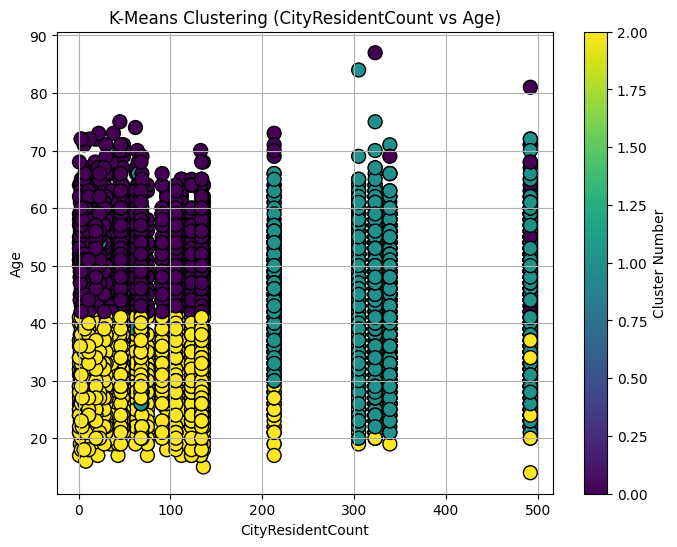

In [ ]:
# Scatter plot with CityResidentCount and Age
plt.figure(figsize=(8, 6))
scatter = plt.scatter( 
    df['DeathsPerCity'],
    df['Age'], 
    c=df['Cluster'], 
    cmap='viridis', 
    s=100, 
    edgecolor='k'
)

# Add labels and title
plt.xlabel('CityResidentCount')
plt.ylabel('Age')
plt.title('K-Means Clustering (CityResidentCount vs Age)')
plt.colorbar(scatter, label='Cluster Number')
plt.grid(True)
plt.show()

In [2]:
df = pd.read_csv("clean8.csv")
df

,Unnamed: 0,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,DeathCity,DeathCounty,Location,...,Hydromorphone,OpiateNOS,AnyOpioid,no_of_drugs,num_of_deaths_in_county,num_of_injuries_in_race,CityResidentCount,Cluster,DeathsPerCity,ResidentsPerCounty
0,0,4/17/2015,32,Male,White,AMSTON,TOLLAND,AMSTON,TOLLAND,Residence,...,0,0,1,3,137,3704,1,2,1,163
1,1,1/28/2015,49,Female,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,1,3,137,3704,3,0,3,163
2,2,10/8/2018,42,Male,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,1,3,137,3704,3,0,3,163
3,3,5/18/2014,34,Male,White,ANDOVER,TOLLAND,ANDOVER,TOLLAND,Residence,...,0,0,0,2,137,3704,3,2,3,163
4,4,1/13/2018,35,Male,White,ANSONIA,NEW HAVEN,ANSONIA,NEW HAVEN,Residence,...,0,0,1,4,1298,3704,37,2,23,1249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,4665,2/16/2013,29,Male,White,WOODBURY,LITCHFIELD,WOODBURY,LITCHFIELD,Residence,...,0,0,0,2,264,3704,6,2,3,296
4666,4666,9/21/2013,49,Female,White,WOODBURY,LITCHFIELD,WOODBURY,LITCHFIELD,Residence,...,0,0,0,1,264,3704,6,0,3,296
4667,4667,12/6/2016,42,Male,White,WOODSTOCK,WINDHAM,WOODSTOCK,WINDHAM,Residence,...,0,0,0,1,166,3704,3,0,3,167
4668,4668,7/14/2018,23,Female,White,WOODSTOCK,WINDHAM,WOODSTOCK,WINDHAM,Residence,...,0,0,1,3,166,3704,3,2,3,167


In [3]:
# Select features for clustering
features = df[['DeathsPerCity', 'no_of_drugs']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=43)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the updated DataFrame
print(df)

c:\Users\Siddharth\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Unnamed: 0        Date  Age     Sex   Race ResidenceCity  \
0              0   4/17/2015   32    Male  White        AMSTON   
1              1   1/28/2015   49  Female  White       ANDOVER   
2              2   10/8/2018   42    Male  White       ANDOVER   
3              3   5/18/2014   34    Male  White       ANDOVER   
4              4   1/13/2018   35    Male  White       ANSONIA   
...          ...         ...  ...     ...    ...           ...   
4665        4665   2/16/2013   29    Male  White      WOODBURY   
4666        4666   9/21/2013   49  Female  White      WOODBURY   
4667        4667   12/6/2016   42    Male  White     WOODSTOCK   
4668        4668   7/14/2018   23  Female  White     WOODSTOCK   
4669        4669  10/14/2017   31    Male  White     WOODSTOCK   

     ResidenceCounty  DeathCity DeathCounty   Location  ... Hydromorphone  \
0            TOLLAND     AMSTON     TOLLAND  Residence  ...             0   
1            TOLLAND    ANDOVER     TOLLAND  Residenc

In [5]:
df.to_csv('clean8_no_of_drugs vs DeathsPerCity.csv')